# 1. Introduction and Overview:
## Understanding Combinatorial Explosion in Grid-Based Problems

## 1. What is Combinatorial Explosion?
- Combinatorial explosion occurs when the number of possible combinations in a problem grows exponentially or super-exponentially with the input size. 
- In grid-based problems, this happens because each increase in grid size dramatically multiplies the number of possible configurations.

### 1.1 Real-World Impact
- Makes exhaustive search impractical for even moderate-sized problems
- Forces us to consider alternative approaches like heuristics or approximations
- This effect can be observed in many domains

## 2. A Sample Case Study: Wind Turbine Placement
- Consider placing "k" wind turbines on an N×N grid. 
- Each turbine must occupy a unique cell. 
- For the sake of simplicity, we are not considering any wake effect and other constraints. 
- This seemingly simple problem demonstrates combinatorial explosion dramatically.

### 2.1 Mathematical Foundation
The number of ways to place k turbines in an N×N grid is given by the binomial coefficient:

$$
\binom{N^2}{k} = \frac{(N^2)!}{k!(N^2-k)!}
$$

This grows super-exponentially with N, making exhaustive search infeasible for larger grids.
<div align="center">
<img src="img\fig1_comb_expl_graph.png" alt="image2" width="400px" />
</div> *Image source: Reprinted from Friedman, R. (2022). A perspective on information optimality in a neural circuit and other biological systems. Signals, 3(2), 410–427.*

# 3. Mathematical Proof of Combinatorial Explosion

   ## 3.1 Number of Ways to Place $k$ Turbines in an $N \times N$ Grid

An $N \times N$ grid has $N^2$ distinct "cells" (or "boxes"). If we wish to place $k$ turbines, **each in a different cell**, we are essentially choosing $k$ distinct positions out of those $N^2$.

* The number of ways to choose $k$ distinct items from $N^2$ items is given by the **binomial coefficient**:

$$\binom{N^2}{k} \;=\; \frac{(N^2)!}{\,k!\,\bigl(N^2 - k\bigr)!}$$

Hence, the total count of distinct layouts (placements) is:

$$\boxed{\text{Number of layouts} \;=\; \binom{N^2}{k}}$$

   ## 3.2 Rapid (Factorial/Binomial) Growth

Recall that $n!$ (factorial) grows faster than any exponential $a^n$ for fixed $a$. The binomial coefficient $\binom{N^2}{k}$ involves factorials, and for large $N$ (even moderate sizes!), these factorials get huge. As a concrete example:

* For $N=4$, we have $16$ cells and we choose $k=10$:
  $$\binom{16}{10} \;=\; 8008$$

* For $N=5$, we have $25$ cells:
  $$\binom{25}{10} \;=\; 3{,}268{,}760$$

* For $N=10$, we have $100$ cells:
  $$\binom{100}{10} \;\approx\; 1.73 \times 10^{13}$$

This number escalates **super‐exponentially** in terms of $N$. Indeed, $\binom{N^2}{k}$ grows very fast because of the factorial terms involved.

## 4. Figuring out the number of combinations that could be possible
<div align="center">
<img src="img/fig2_grid.png" alt="4x4-Grid" width="300px" />
</div>
*Image source: Grid [Digital image]. (n.d.). University of South Florida, ETC Clip Art Collection. Retrieved February 3, 2025, from https://etc.usf.edu/clipart/42600/42668/grid_42668.htm*


In [3]:
import math
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from typing import List, Tuple
%matplotlib inline

def calculate_turbine_combinations(N: int, k: int) -> Tuple[int, List[List[Tuple[int, int]]]]:
    """
    Calculate possible ways to place k turbines in an N×N grid and generate example layouts.
    
    Parameters:
    -----------
    N : int
        Grid size (N×N)
    k : int
        Number of turbines to place
        
    Returns:
    --------
    Tuple[int, List[List[Tuple[int, int]]]]
        Total number of combinations and up to 5 example layouts
    """
    if N < 1:
        raise ValueError("Grid size N must be positive")
    if k < 0:
        raise ValueError("Number of turbines k must be non-negative")
    if k > N * N:
        raise ValueError(f"Cannot place {k} turbines in a {N}x{N} grid with {N*N} cells")
        
    # Calculate total combinations
    total_combinations = math.comb(N * N, k)
    
    # Generate example layouts
    grid_positions = range(N * N)
    sample_layouts = []
    
    # Only generate if total is manageable
    if total_combinations <= 1_000_000:  # Safety limit
        for i, combo in enumerate(itertools.combinations(grid_positions, k)):
            if i >= 5:  # Limit to 5 examples
                break
            # Convert to 2D coordinates
            coords = [(pos // N, pos % N) for pos in combo]
            sample_layouts.append(coords)
            
    return total_combinations, sample_layouts

def visualize_layout(N: int, layout: List[Tuple[int, int]]) -> str:
    """
    Create a string representation of a grid layout.
    """
    grid = [['.' for _ in range(N)] for _ in range(N)]
    for row, col in layout:
        grid[row][col] = 'T'
    return '\n'.join(' '.join(row) for row in grid)

# Example usage
if __name__ == "__main__":
    try:
        N, k = 4, 3  # Example case
        total, samples = calculate_turbine_combinations(N, k)
        
        print(f"Grid size: {N}x{N}")
        print(f"Number of turbines: {k}")
        print(f"Total possible combinations: {total:,}")
        
        if samples:
            print("\nExample layout:")
            print(visualize_layout(N, samples[0]))
                
    except ValueError as e:
        print(f"Error: {e}")

Grid size: 4x4
Number of turbines: 3
Total possible combinations: 560

Example layout:
T T T .
. . . .
. . . .
. . . .


## 5. Analyzing Growth and Scaling
Let's visualize how quickly the number of combinations grows with grid size and analyze the computational feasibility of exhaustive search approaches.

- As soon as the value of N starts increasing, it is clear that this approach becacomes complicated and this implementation, will turn out to an impractical
  solution.
- Hence a brute force approach would be more time consuming and memory intensive.
- For larger grids, alternative methods (e.g., mathematical calculations or heuristic optimization) would be required

Grid-based Placement - Combinatorial Growth
-------------------------------------------------------
Grid Size    Cells (N²)   Possible Configurations  
-------------------------------------------------------
4x4          16           8.0 thousand             
5x5          25           3.3 million              
6x6          36           254.2 million            
7x7          49           8.2 billion              
8x8          64           151.5 billion            
9x9          81           1.9 trillion             
10x10         100          17.3 trillion            




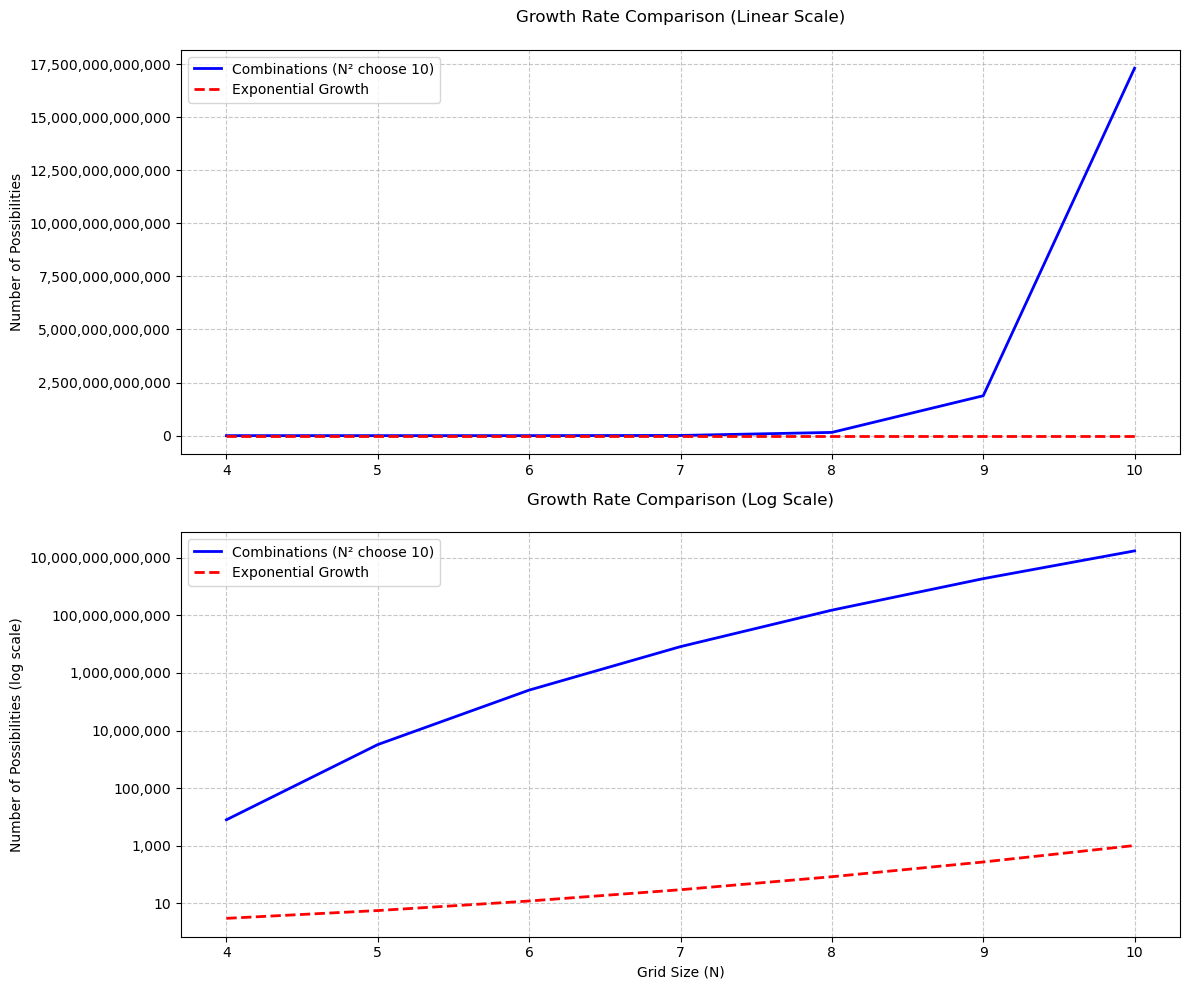


As we can see, this brute-force approach quickly becomes infeasible as N increases.
The number of possible configurations grows super-exponentially, making exhaustive search impractical.


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import FuncFormatter

def visualize_combinatorial_growth(N_range: range, k: int, show_table: bool = True, save_path: str = None) -> plt.Figure:
    """
    Comprehensive visualization of combinatorial growth with both table and plots.

    Parameters:
    -----------
    N_range : range
        Range of grid sizes to analyze
    k : int
        Number of items to place
    show_table : bool
        Whether to display the numerical table
    save_path : str
        File path to save the figure (optional)
    """
    # Calculate values
    N_values = np.array(list(N_range))
    if any(k > N * N for N in N_values):
        raise ValueError(f"'k' cannot exceed the total number of cells (N²). Ensure k <= N² for all values in N_range.")

    combinations = np.array([math.comb(N * N, k) for N in N_values])
    exponential = np.array([2 ** (N * N / 10) for N in N_values])  # Scaled
    
    # Display table if requested
    if show_table:
        print("Grid-based Placement - Combinatorial Growth")
        print("-" * 55)
        print(f"{'Grid Size':<12} {'Cells (N²)':<12} {'Possible Configurations':<25}")
        print("-" * 55)
        for N, total in zip(N_values, combinations):
            print(f"{N}x{N:<10} {N * N:<12} {format_large_number(total):<25}")
        print("\n")
    
    # Create visualization
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Linear scale plot
    ax1.plot(N_values, combinations, 'b-', label=f'Combinations (N² choose {k})', linewidth=2)
    ax1.plot(N_values, exponential, 'r--', label='Exponential Growth', linewidth=2)
    ax1.set_title('Growth Rate Comparison (Linear Scale)', pad=20)
    ax1.set_ylabel('Number of Possibilities')
    ax1.grid(True, linestyle='--', alpha=0.7)
    ax1.legend()
    
    # Log scale plot
    ax2.plot(N_values, combinations, 'b-', label=f'Combinations (N² choose {k})', linewidth=2)
    ax2.plot(N_values, exponential, 'r--', label='Exponential Growth', linewidth=2)
    ax2.set_yscale('log')
    ax2.set_title('Growth Rate Comparison (Log Scale)', pad=20)
    ax2.set_xlabel('Grid Size (N)')
    ax2.set_ylabel('Number of Possibilities (log scale)')
    ax2.grid(True, linestyle='--', alpha=0.7)
    ax2.legend()
    
    # Customize formatting
    for ax in [ax1, ax2]:
        ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{x:,.0f}'))
    
    # Add dynamic annotation
    crossover_idx = np.argmax(combinations > exponential)
    if crossover_idx > 0:
        ax2.annotate(
            'Combinatorial growth\nexceeds exponential',
            xy=(N_values[crossover_idx], combinations[crossover_idx]),
            xytext=(30, 30),
            textcoords='offset points',
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='gray', alpha=0.8),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2')
        )
    
    plt.tight_layout()
    
    # Save figure if requested
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches="tight")
    
    return fig

def format_large_number(n: float) -> str:
    """Format large numbers with proper suffix."""
    suffixes = [(1e12, "trillion"), (1e9, "billion"), (1e6, "million"), (1e3, "thousand")]
    for threshold, suffix in suffixes:
        if n >= threshold:
            return f"{n / threshold:.1f} {suffix}"
    return f"{n:,.0f}"  # Default for numbers less than 1,000

# Example usage
if __name__ == "__main__":
    fig = visualize_combinatorial_growth(range(4, 11), 10, show_table=True)
    plt.show()
    print("\nAs we can see, this brute-force approach quickly becomes infeasible as N increases.")
    print("The number of possible configurations grows super-exponentially, making exhaustive search impractical.")


## 6. Hardware Feasibility Analysis
Let's analyze whether modern hardware could handle this combinatorial explosion. We'll use the specifications of NVIDIA's H200 GPU, one of the most powerful AI accelerators available:

- 989 TFLOPS (FP32)
- 141 GB HBM3e Memory
- 4.8 TB/s Memory Bandwidth

Even with such powerful hardware, we'll see how quickly the problem becomes intractable.

In [16]:
import math

def format_large_number(n):
    """Formats large numbers into a human-readable string."""
    if n < 1e3:
        return f"{n:,.0f}"
    elif n < 1e6:
        return f"{n/1e3:.1f}K (thousand)"
    elif n < 1e9:
        return f"{n/1e6:.1f}M (million)"
    elif n < 1e12:
        return f"{n/1e9:.1f}B (billion)"
    elif n < 1e15:
        return f"{n/1e12:.1f}T (trillion)"
    else:
        # Use scientific notation for extremely large numbers
        return f"{n:.2e}"

def format_time_improved(seconds):
    """Formats time into a human-readable string."""
    if seconds < 60:
        return f"{seconds:.1f} seconds"
    elif seconds < 3600:
        minutes = seconds / 60
        return f"{minutes:.1f} minutes"
    elif seconds < 86400:
        hours = seconds / 3600
        return f"{hours:.1f} hours"
    elif seconds < 31536000:
        days = seconds / 86400
        return f"{days:.1f} days"
    else:
        years = seconds / 31536000
        return f"{years:.1f} years"

def format_bytes_improved(byte_count):
    """Formats bytes into a human-readable string."""
    if byte_count < 1024:
        return f"{byte_count} Bytes"
    elif byte_count < 1024**2:
        return f"{byte_count / 1024:.2f} KB"
    elif byte_count < 1024**3:
        return f"{byte_count / 1024**2:.2f} MB"
    elif byte_count < 1024**4:
        return f"{byte_count / 1024**3:.2f} GB"
    elif byte_count < 1024**5:
        return f"{byte_count / 1024**4:.2f} TB"
    else:
        return f"{byte_count / 1024**5:.2f} PB"

def analyze_computational_requirements(N: int, k: int = 10) -> dict:
    """
    Analyzes computational requirements for an N x N grid using NVIDIA H200 specs.

    Parameters:
    -----------
    N : int
        Size of one side of the grid.
    k : int
        Number of combinations to consider (default=10).

    Returns:
    --------
    dict
        A dictionary containing human-readable analysis results.
    """
    # NVIDIA H200 GPU specifications
    H200_FLOPS = 989 * (10**12)     # 989 TFLOPS for FP32 operations
    H200_MEMORY = 141 * (10**9)     # 141 GB in bytes
    H200_BANDWIDTH = 4.8 * (10**12) # 4.8 TB/s in bytes per second
    PCIe_BANDWIDTH = 16 * (10**9)   # 16 GB/s PCIe 4.0 bandwidth
    GPU_EFFICIENCY = 0.8            # Assume 80% GPU efficiency for FLOPs and bandwidth

    # Adjusted effective specifications considering GPU efficiency
    effective_flops = H200_FLOPS * GPU_EFFICIENCY
    effective_bandwidth = H200_BANDWIDTH * GPU_EFFICIENCY

    try:
        # Calculate the total number of cells in the grid
        total_cells = N * N

        # Calculate the total number of combinations (N² choose k)
        total_combinations = math.comb(total_cells, k)

        # Calculate memory required to store all combinations (64 bytes per combination)
        memory_required = total_combinations * 64

        # Calculate the total floating-point operations needed (1000 FLOPs per combination)
        operations_needed = total_combinations * 1000

        # Calculate processing time based on effective GPU performance
        processing_time = operations_needed / effective_flops

        # Calculate data transfer time based on effective GPU bandwidth
        transfer_time = memory_required / effective_bandwidth

        # Calculate additional PCIe transfer latency
        pci_transfer_time = memory_required / PCIe_BANDWIDTH

        # Add PCIe transfer latency to total transfer time
        total_transfer_time = transfer_time + pci_transfer_time

        # Return a dictionary of results
        return {
            "grid_size": f"{N}x{N}",
            "total_cells": total_cells,
            "combinations": total_combinations,
            "combinations_readable": format_large_number(total_combinations),
            "memory_required": format_bytes_improved(memory_required),
            "processing_time": format_time_improved(processing_time),
            "transfer_time": format_time_improved(total_transfer_time),
            "exceeds_memory": memory_required > H200_MEMORY,
            "raw_metrics": {
                "memory_bytes": memory_required,
                "processing_seconds": processing_time,
                "transfer_seconds": total_transfer_time
            }
        }
    except OverflowError:
        # Handle cases where numbers are too large to compute
        return {
            "grid_size": f"{N}x{N}",
            "error": "Numbers too large for Python to handle! Try a smaller grid size."
        }

def demonstrate_h200_limitations():
    """
    Demonstrates the computational limitations of the NVIDIA H200 GPU by analyzing
    the combinatorial requirements of various grid sizes.
    """
    print("\n🖥️  NVIDIA H200 GPU Analysis")
    print("=" * 80)
    print("Grid Size | Possible Configurations | Storage Needed  | Time to Process")
    print("-" * 80)

    # Test cases for different grid sizes
    test_cases = [10, 20, 50, 100]

    for N in test_cases:
        # Analyze computational requirements for each grid size
        analysis = analyze_computational_requirements(N)

        # Handle cases where calculations exceed Python's numeric limits
        if "error" in analysis:
            print(f"{N}x{N:<8} | {analysis['error']}")
            continue

        # Extract human-readable metrics
        grid = analysis["grid_size"]
        combinations = analysis["combinations_readable"]
        memory = analysis["memory_required"]
        time = analysis["processing_time"]

        # Print analysis results in a readable format
        print(f"{grid:<9} | {combinations:<24} | {memory:<15} | {time}")

        # Warn if the memory requirement exceeds the GPU's memory
        if analysis.get("exceeds_memory"):
            print("⚠️  Warning: This exceeds the H200's memory capacity (141 GB).")
        print("-" * 80)

    # Provide detailed analysis for a specific case
    print("\n📊 Detailed Analysis of 20x20 Grid:")
    detailed = analyze_computational_requirements(20)

    # Print detailed results for the specific case
    if "error" not in detailed:
        print(f"  📌 Grid cells: {detailed['total_cells']}")
        print(f"  🔢 Combinations: {detailed['combinations_readable']}")
        print(f"  💾 Storage needed: {detailed['memory_required']}")
        print(f"  ⏱️  Processing time: {detailed['processing_time']}")
        print(f"  🔄 Data transfer time: {detailed['transfer_time']}")
        if detailed.get("exceeds_memory"):
            print("\n⚠️  Note: This workload exceeds the H200's memory capacity.")
    else:
        print(f"  ❌ {detailed['error']}")

# Run the demonstration
if __name__ == "__main__":
    demonstrate_h200_limitations()



🖥️  NVIDIA H200 GPU Analysis
Grid Size | Possible Configurations | Storage Needed  | Time to Process
--------------------------------------------------------------------------------
10x10     | 17.3T (trillion)         | 1007.59 TB      | 17.5 seconds
⚠️  Warning: This exceeds the H200's memory capacity (141 GB).
--------------------------------------------------------------------------------
20x20     | 2.58e+19                 | 1466450.82 PB   | 301.9 days
⚠️  Warning: This exceeds the H200's memory capacity (141 GB).
--------------------------------------------------------------------------------
50x50     | 2.58e+27                 | 146720238143586.47 PB | 82757418.3 years
⚠️  Warning: This exceeds the H200's memory capacity (141 GB).
--------------------------------------------------------------------------------
100x100   | 2.74e+33                 | 155941681759445745664.00 PB | 87958765265949.4 years
⚠️  Warning: This exceeds the H200's memory capacity (141 GB).
------------

## 7. Conclusions and Implications

### 7.1 Key Findings
1. The number of possible configurations grows super-exponentially with grid size
2. Even with state-of-the-art hardware like the NVIDIA H200, brute force approaches become impractical quickly
3. Memory requirements become a bottleneck before computational time in many cases

### 7.2 Alternative Approaches
Given the infeasibility of exhaustive search, alternative approaches should be considered:

1. **Heuristic Methods**
   - Genetic algorithms
   - Simulated annealing
   - Hill climbing with random restarts

2. **Mathematical Optimization**
   - Integer linear programming
   - Constraint satisfaction problems
   - Local search algorithms

3. **Approximation Algorithms**
   - Polynomial-time approximation schemes
   - Randomized algorithms
   - Greedy algorithms with provable bounds